In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')
df3 = pd.read_csv('./data/210730_Index_ALL.txt', sep = ',')

frames = [df1, df2, df3]
df = pd.concat(frames, ignore_index = True)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20210730,12.4,12.4,12.1,12.4,166400
1,ABT,20210730,26.0,27.2,26.0,27.1,1207
2,ACM,20210730,2.3,2.4,2.3,2.4,592463
3,ADC,20210730,21.5,21.5,21.5,21.5,0
4,ALT,20210730,12.7,12.7,12.7,12.7,0


In [3]:
%%HTML
<h1>Extract Data</h1>

In [4]:
#Remove redundant characters
df.columns=df.columns.str.replace('[<,>]','', regex=True)
print(df)

          Ticker  DTYYYYMMDD   Open    High     Low   Close  Volume
0            AAV    20210730   12.4   12.40   12.10   12.40  166400
1            ABT    20210730   26.0   27.20   26.00   27.10    1207
2            ACM    20210730    2.3    2.40    2.30    2.40  592463
3            ADC    20210730   21.5   21.50   21.50   21.50       0
4            ALT    20210730   12.7   12.70   12.70   12.70       0
...          ...         ...    ...     ...     ...     ...     ...
1452735  VNINDEX    20030609  152.0  152.49  152.35  152.35       0
1452736  VNINDEX    20030602  151.0  151.66  151.44  151.66       0
1452737  VNINDEX    20030530  152.0  152.47  152.24  152.24       0
1452738  VNINDEX    20030529  153.0  152.74  152.32  152.32       0
1452739  VNINDEX    20020314  189.0  188.97  188.97  188.97       0

[1452740 rows x 7 columns]


In [5]:
#Drop duplicate records
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')
print(df_modified)

          Ticker  DTYYYYMMDD   Open    High     Low   Close  Volume
0            AAV    20210730   12.4   12.40   12.10   12.40  166400
1            ABT    20210730   26.0   27.20   26.00   27.10    1207
2            ACM    20210730    2.3    2.40    2.30    2.40  592463
3            ADC    20210730   21.5   21.50   21.50   21.50       0
4            ALT    20210730   12.7   12.70   12.70   12.70       0
...          ...         ...    ...     ...     ...     ...     ...
1452735  VNINDEX    20030609  152.0  152.49  152.35  152.35       0
1452736  VNINDEX    20030602  151.0  151.66  151.44  151.66       0
1452737  VNINDEX    20030530  152.0  152.47  152.24  152.24       0
1452738  VNINDEX    20030529  153.0  152.74  152.32  152.32       0
1452739  VNINDEX    20020314  189.0  188.97  188.97  188.97       0

[1452727 rows x 7 columns]


In [6]:
#Pivot the table
data = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
print(data)

Ticker        AAA   AAM   AAT   AAV    ABS   ABT    ACB    ACC    ACL  ACM  \
DTYYYYMMDD                                                                   
20020314      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030529      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030530      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030602      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
20030609      NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  NaN   
...           ...   ...   ...   ...    ...   ...    ...    ...    ...  ...   
20210726    15.45  10.8  17.5  12.4  18.55  27.6  32.70  14.00  11.40  2.3   
20210727    16.00  10.5  17.7  12.4  18.90  27.6  33.15  13.70  11.60  2.3   
20210728    16.30  10.1  17.6  12.4  19.35  27.0  33.15  13.70  11.60  2.3   
20210729    16.15  10.8  17.6  12.4  19.95  27.0  34.15  13.70  11.50  2.3   
20210730    16.15  10.9  17.6  12.4  20.40  27.1  36.15  13.75  

In [7]:
%%HTML
<h1>Filter Data</h1>

In [8]:
%%HTML
<h3>Here we only consider data between 02/01/2018 and 28/12/2018 (a total of 250 days)</h3>

In [9]:
data = data.loc[20180102:20181228]
print(data)

Ticker         AAA    AAM  AAT    AAV  ABS     ABT     ACB     ACC     ACL  \
DTYYYYMMDD                                                                   
20180102    21.245  6.506  NaN    NaN  NaN  23.750  14.502  11.121   3.425   
20180103    21.310  6.286  NaN    NaN  NaN  23.673  14.465  11.287   3.304   
20180104    21.213  6.286  NaN    NaN  NaN  24.133  14.502  11.342   3.405   
20180105    21.083  6.569  NaN    NaN  NaN  23.980  14.502  11.342   3.385   
20180108    21.698  6.537  NaN    NaN  NaN  23.520  14.988  11.287   3.162   
...            ...    ...  ...    ...  ...     ...     ...     ...     ...   
20181224    13.040  9.014  NaN  7.893  NaN  36.541  13.710  13.221  13.201   
20181225    12.776  9.117  NaN  7.893  NaN  34.629  13.615  13.221  12.365   
20181226    12.776  9.186  NaN  7.893  NaN  33.609  13.568  13.221  12.429   
20181227    13.128  9.048  NaN  7.972  NaN  35.946  13.899  13.221  12.858   
20181228    12.952  9.186  NaN  7.972  NaN  34.161  13.993  13.2

In [10]:
%%HTML
<h1>Clean Data</h1>

In [11]:
pd.set_option('display.precision', 3)

In [12]:
#Check for missing values
data.isnull().values.any()

True

<AxesSubplot:>

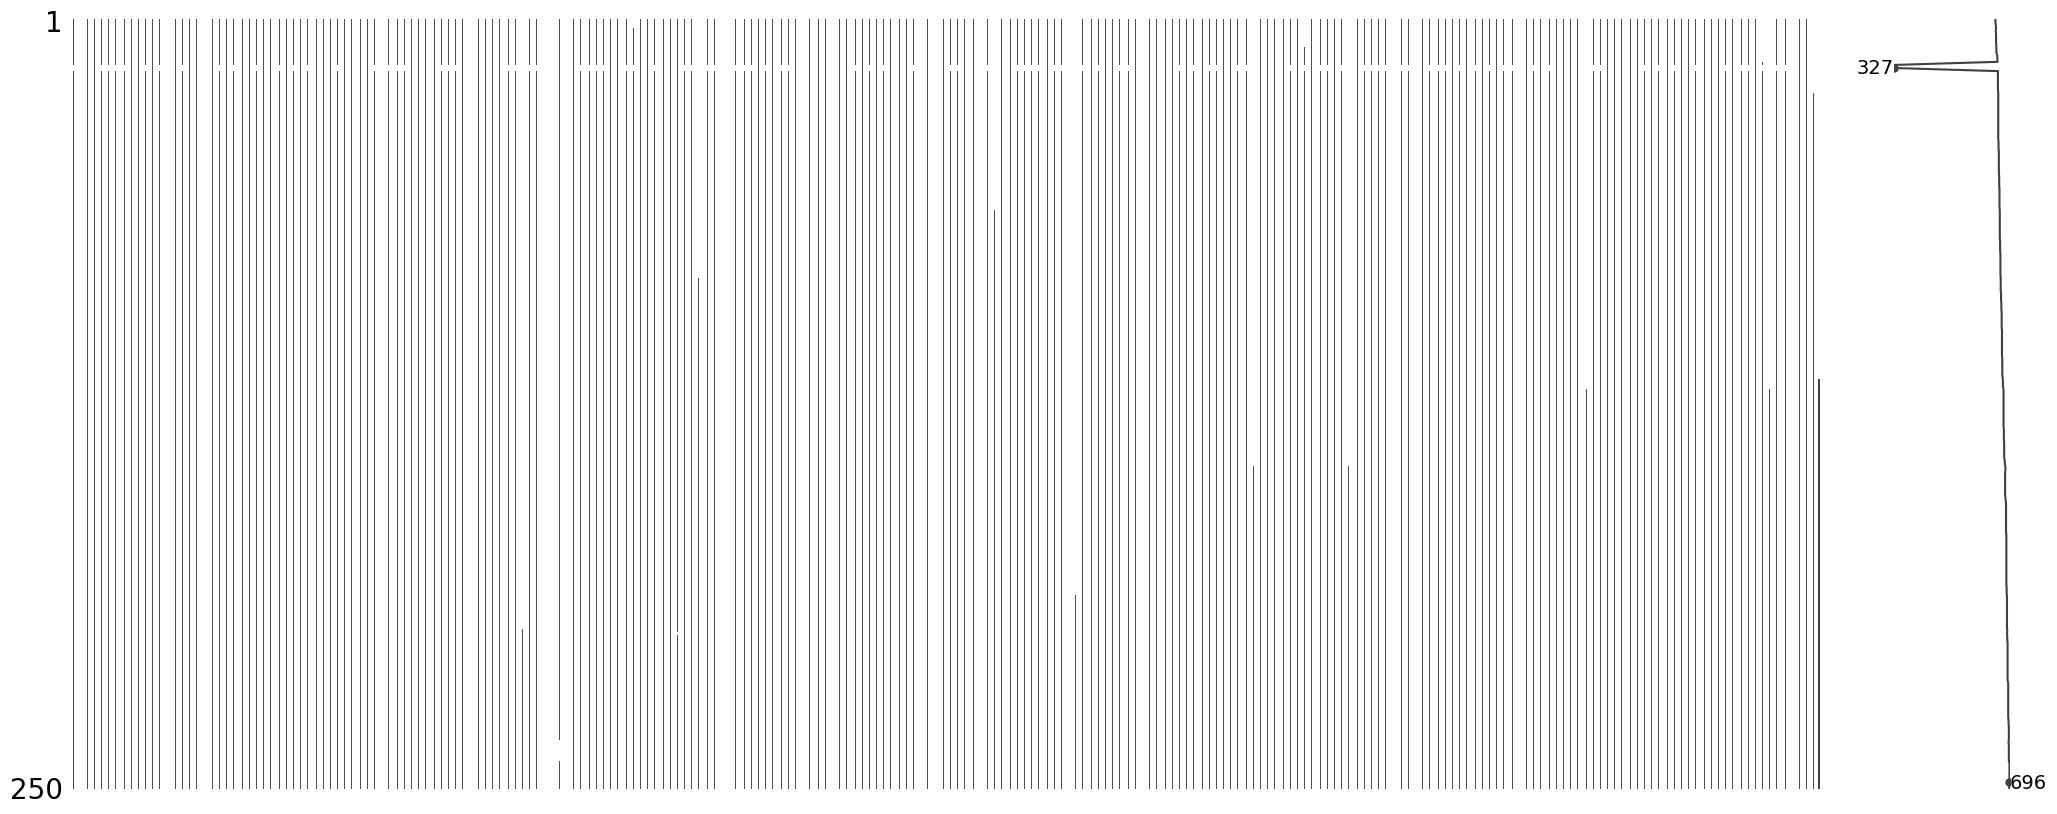

In [13]:
#Plot the missing value matrix
import missingno
missingno.matrix(data)

In [14]:
%%HTML
<h3>We shall remove all the columns with more than 20% of missing data</h3>

In [15]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (250, 755)
Data Shape after cleaning = (250, 662)


In [16]:
#Fill the remaining missing values with already available values
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
print(data)

Ticker         AAA    AAM     ABT     ACB     ACC     ACL  ACM     ADC  \
DTYYYYMMDD                                                               
20180102    21.245  6.506  23.750  14.502  11.121   3.425  1.7   8.951   
20180103    21.310  6.286  23.673  14.465  11.287   3.304  1.6   9.007   
20180104    21.213  6.286  24.133  14.502  11.342   3.405  1.6   9.007   
20180105    21.083  6.569  23.980  14.502  11.342   3.385  1.5   9.007   
20180108    21.698  6.537  23.520  14.988  11.287   3.162  1.6   9.007   
...            ...    ...     ...     ...     ...     ...  ...     ...   
20181224    13.040  9.014  36.541  13.710  13.221  13.201  0.7  11.034   
20181225    12.776  9.117  34.629  13.615  13.221  12.365  0.7  11.034   
20181226    12.776  9.186  33.609  13.568  13.221  12.429  0.8  11.034   
20181227    13.128  9.048  35.946  13.899  13.221  12.858  0.7  11.034   
20181228    12.952  9.186  34.161  13.993  13.221  12.858  0.7  11.034   

Ticker         ADS    AGM  ...     VT

In [17]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change()

returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.dropna(inplace=True)

print(returns)
data1 = returns


Ticker        AAA    AAM    ABT    ACB    ACC    ACL    ACM    ADC    ADS  \
DTYYYYMMDD                                                                  
20180103    0.003 -0.034 -0.003 -0.003  0.015 -0.035 -0.059  0.006  0.003   
20180104   -0.005  0.000  0.019  0.003  0.005  0.031  0.000  0.000  0.000   
20180105   -0.006  0.045 -0.006  0.000  0.000 -0.006 -0.062  0.000  0.003   
20180108    0.029 -0.005 -0.019  0.034 -0.005 -0.066  0.067  0.000  0.006   
20180109    0.012 -0.005  0.008  0.005 -0.010 -0.023  0.000  0.000  0.008   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
20181224   -0.023  0.004  0.000 -0.014  0.000 -0.052  0.000  0.097 -0.015   
20181225   -0.020  0.011 -0.052 -0.007  0.000 -0.063  0.000  0.000  0.000   
20181226    0.000  0.008 -0.029 -0.003  0.000  0.005  0.143  0.000 -0.008   
20181227    0.028 -0.015  0.070  0.024  0.000  0.035 -0.125  0.000  0.046   
20181228   -0.013  0.015 -0.050  0.007  0.000  0.000  0.000  0.000  0.051   

In [18]:
returns = returns.reset_index()
returns = returns.drop(['DTYYYYMMDD'], axis=1)
returns.head()

Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,ADS,AGM,...,VTB,VTH,VTJ,VTL,VTO,VTV,VXB,WCS,WSS,X20
0,0.003,-0.034,-0.003,-0.003,0.015,-0.035,-0.059,0.006,0.003,0.000,...,-0.019,0.006,0.000,0.0,-0.006,-0.031,0.0,-3.118e-03,0.025,0.0
1,-0.005,0.000,0.019,0.003,0.005,0.031,0.000,0.000,0.000,-0.045,...,-0.006,0.000,0.000,0.0,0.020,0.019,0.0,2.194e-02,0.000,0.0
2,-0.006,0.045,-0.006,0.000,0.000,-0.006,-0.062,0.000,0.003,0.047,...,-0.040,0.000,0.000,0.0,-0.009,0.044,0.0,-1.841e-02,-0.024,0.0
3,0.029,-0.005,-0.019,0.034,-0.005,-0.066,0.067,0.000,0.006,-0.023,...,0.035,0.000,-0.055,0.0,-0.006,-0.030,0.1,6.236e-04,0.000,0.0
4,0.012,-0.005,0.008,0.005,-0.010,-0.023,0.000,0.000,0.008,0.000,...,0.023,-0.071,0.000,0.0,0.006,0.019,0.1,6.335e-04,0.025,0.0


In [19]:
#returns = returns.transpose()
#returns.head()

In [20]:
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 25
N_PRIN_COMPONENTS = 10
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(returns)

PCA(n_components=10)

In [21]:
pca.components_.T.shape

(662, 10)

In [22]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit_transform(pca.components_.T)
print(X.shape)

(662, 10)


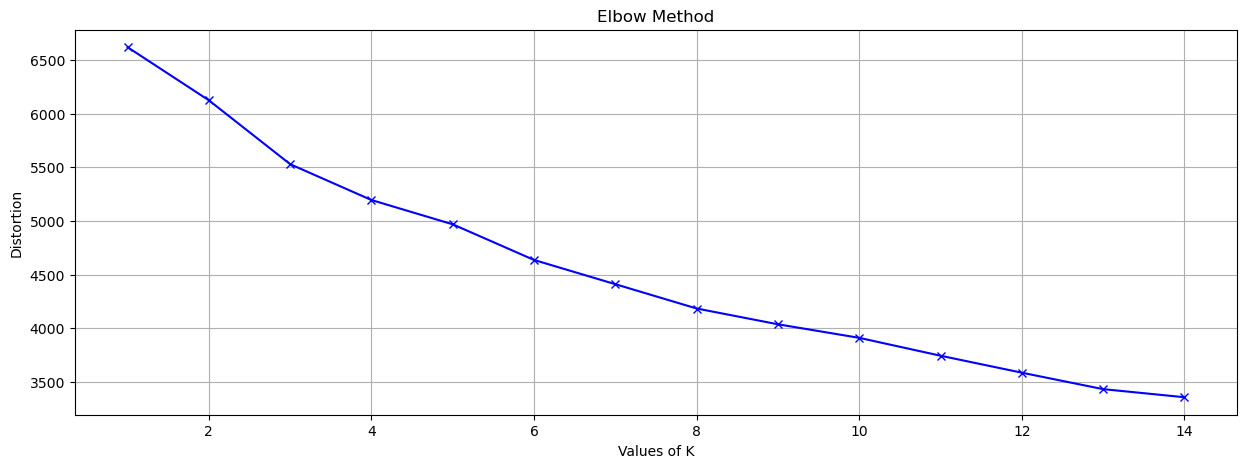

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [24]:
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

6

In [25]:
c = 8
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

labels = kmeans.labels_
clustered = kmeans.labels_
#Plot the results
#centroids = k_means.cluster_centers_
#fig = plt.figure(figsize = (18,10))
#ax = fig.add_subplot(111)
#scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
#ax.set_title('k-Means Cluster Analysis Results')
#ax.set_xlabel('Mean Return')
#ax.set_ylabel('Volatility')
#plt.colorbar(scatter)
#plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=10)
#plt.show()

In [26]:
from sklearn import metrics
print("kmeans", metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'))

kmeans 0.08886717228453593


In [27]:
# the initial dimensionality of the search was
ticker_count = len(returns.columns)
print("Total pairs possible in universe: %d " % (ticker_count*(ticker_count-1)/2))

Total pairs possible in universe: 218791 


In [28]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [29]:
from sklearn.manifold import TSNE
X_tsne = TSNE(init = "random", learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

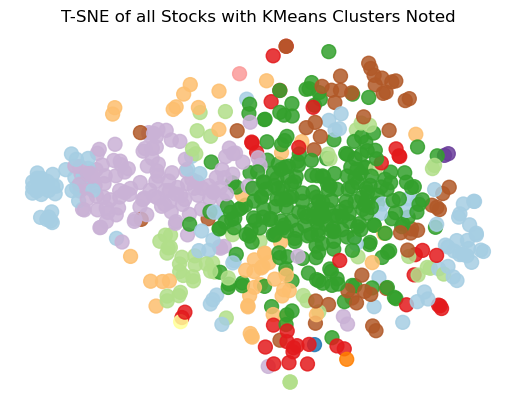

In [30]:
import matplotlib.cm as cm
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')
plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with KMeans Clusters Noted');

Text(0, 0.5, 'Cluster Number')

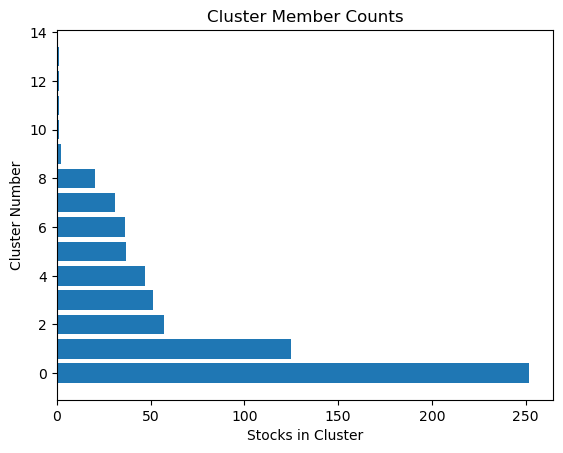

In [31]:
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

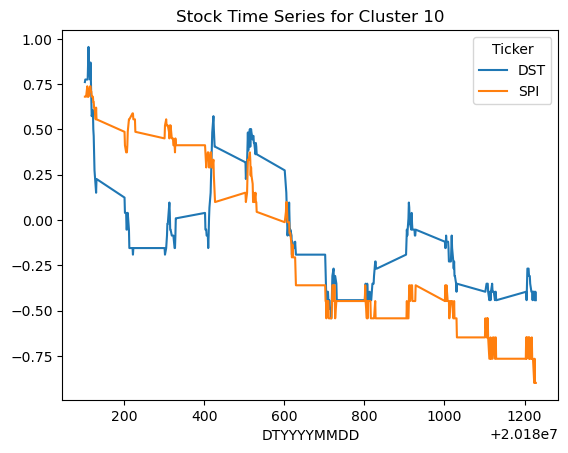

In [32]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(data[tickers].mean())
    datas = np.log(data[tickers]).sub(means)
    datas.plot(title='Stock Time Series for Cluster %d' % clust)

In [33]:
%%HTML
<h1>Pair Selection</h1>

In [34]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 10
Pairs to evaluate: 90560


In [35]:
%%HTML
<h3>Cointegration and pair selection function</h3>

In [36]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [37]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(returns[tickers])
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [38]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [39]:
pairs

[('AAM', 'ABT'),
 ('AAM', 'ADC'),
 ('AAM', 'ADS'),
 ('AAM', 'ALT'),
 ('AAM', 'APG'),
 ('AAM', 'ASP'),
 ('AAM', 'BAB'),
 ('AAM', 'BCE'),
 ('AAM', 'BED'),
 ('AAM', 'BIC'),
 ('AAM', 'BKC'),
 ('AAM', 'BLF'),
 ('AAM', 'BMC'),
 ('AAM', 'BPC'),
 ('AAM', 'BRC'),
 ('AAM', 'BSC'),
 ('AAM', 'BST'),
 ('AAM', 'BTP'),
 ('AAM', 'BVS'),
 ('AAM', 'BWE'),
 ('AAM', 'BXH'),
 ('AAM', 'CAG'),
 ('AAM', 'CAP'),
 ('AAM', 'CAV'),
 ('AAM', 'CCI'),
 ('AAM', 'CCL'),
 ('AAM', 'CDC'),
 ('AAM', 'CEE'),
 ('AAM', 'CHP'),
 ('AAM', 'CIG'),
 ('AAM', 'CII'),
 ('AAM', 'CJC'),
 ('AAM', 'CLC'),
 ('AAM', 'CLM'),
 ('AAM', 'CMC'),
 ('AAM', 'CMS'),
 ('AAM', 'CMV'),
 ('AAM', 'CNG'),
 ('AAM', 'COM'),
 ('AAM', 'CTI'),
 ('AAM', 'CTT'),
 ('AAM', 'CX8'),
 ('AAM', 'D2D'),
 ('AAM', 'DAD'),
 ('AAM', 'DAE'),
 ('AAM', 'DAH'),
 ('AAM', 'DC2'),
 ('AAM', 'DGC'),
 ('AAM', 'DHA'),
 ('AAM', 'DHP'),
 ('AAM', 'DL1'),
 ('AAM', 'DNC'),
 ('AAM', 'DNM'),
 ('AAM', 'DP3'),
 ('AAM', 'DPR'),
 ('AAM', 'DRL'),
 ('AAM', 'DSN'),
 ('AAM', 'DTK'),
 ('AAM', 'DTL'

In [40]:
%%HTML
<h1>TSNE Visualization</h1>

In [41]:
stocks = np.unique(pairs)
X_df = pd.DataFrame(index=returns.T.index, data=X)
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.loc[stocks]

X_tsne = TSNE(init = "random", learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

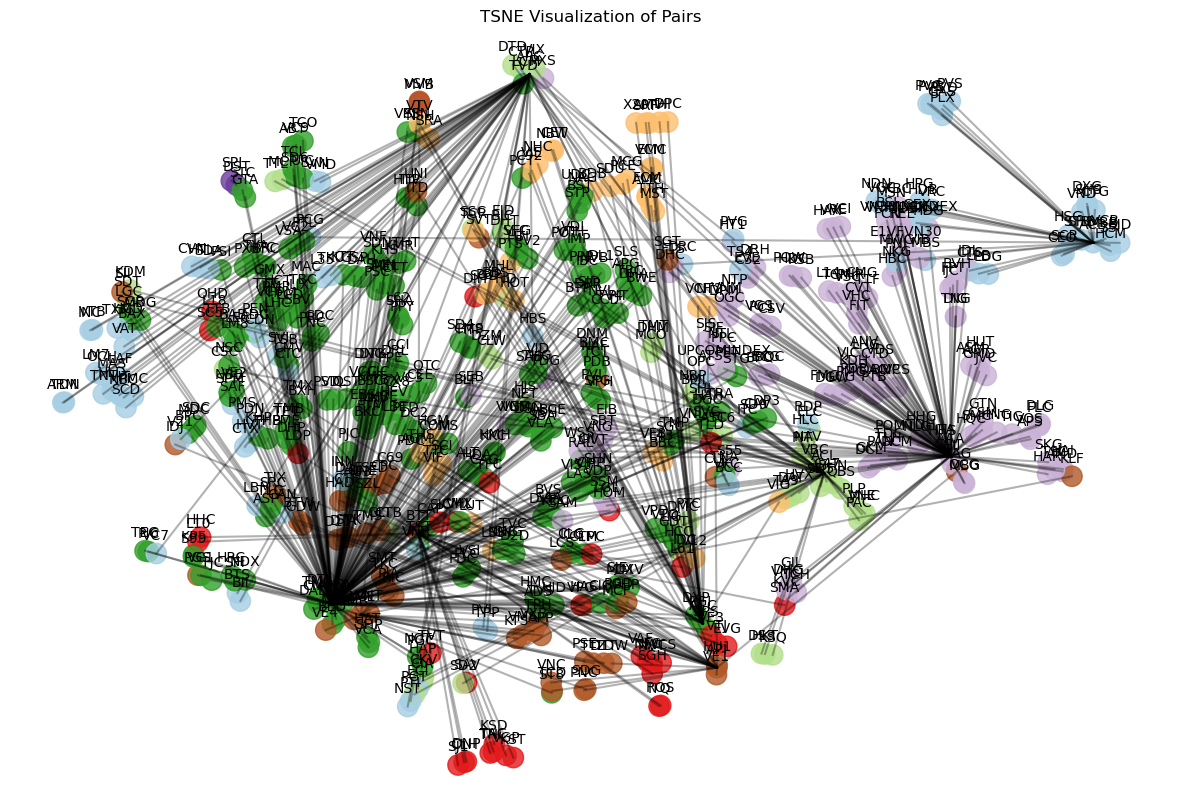

In [42]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[1]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3);
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()